In [2]:
# Is it a Teutonic Knight?

!pip install -Uqq fastai duckduckgo_search

# Importing Libraries
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from time import sleep

# Search Image Function
def search_images(term, max_images=30):
  print(f"Searching for '{term}'")
  return L(ddg_images(term, max_results=max_images)).itemgot('image')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00


In [3]:
urls = search_images('Teutonic Knight', max_images=1)
urls[0]

Searching for 'Teutonic Knight'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


'https://img00.deviantart.net/8642/i/2014/339/4/2/teutonic_knight_by_sandu61-d88juwi.jpg'

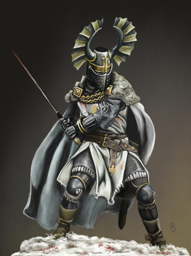

In [4]:
dest = 'Teutonic_Knight.jpg'
download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256, 256)

Searching for 'dog photos'


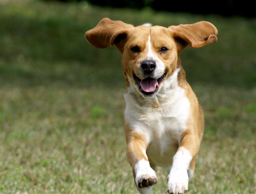

In [5]:
# Doing the same with 'dog photos' basically which is not a 'Teutonic Knight'

download_url(search_images('dog photos', max_images=1)[0], 'dog.jpg', show_progress=False)
Image.open('dog.jpg').to_thumb(256, 256)

In [6]:
# Saving groups of each photos to a different folder

searches = 'Teutonic Knight', 'dog'
path = Path('TeutonicKnight_or_not')

for o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{o} photo'))
  sleep(10)
  download_images(dest, urls=search_images(f'{o} sun photo'))
  sleep(10)
  download_images(dest, urls=search_images(f'{o} shade photo'))
  sleep(10)

  resize_images(path/o, max_size=400, dest=path/o)

Searching for 'Teutonic Knight photo'
Searching for 'Teutonic Knight sun photo'
Searching for 'Teutonic Knight shade photo'
Searching for 'dog photo'
Searching for 'dog sun photo'
Searching for 'dog shade photo'


In [7]:
# Removing photos which failed to download correctly

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print(f"Number of bad images removed: {len(failed)}")

Number of bad images removed: 19


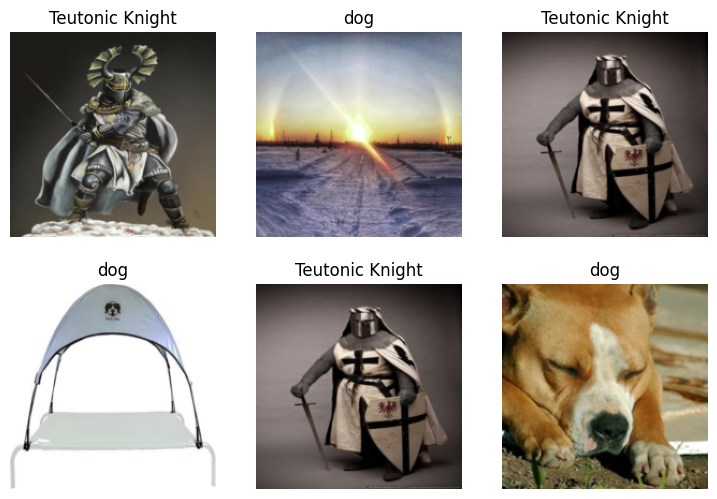

In [8]:
# Creating datablock

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [9]:
# Training the model
# Using resnet18

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 109MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.322907,1.836012,0.533333,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.354468,0.539153,0.266667,00:24
1,0.203342,0.096349,0.066667,00:25
2,0.134618,0.021972,0.000000,00:22


In [10]:
is_Knight,_,probs = learn.predict(PILImage.create('Teutonic_Knight.jpg'))
print(f"This is a {is_Knight}.")
print(f"Probability it's a Teutonic Knight: {probs[0]:.4f}")

This is a Teutonic Knight.
Probability it's a Teutonic Knight: 1.0000
